<a href="https://colab.research.google.com/github/davidvrchen/Probability/blob/main/HW1_2IIG0_23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [ ]:
#!pip3 install scikit-learn==1.3.2

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


## Question 1, Gradient Descent

In [ ]:
def sigmoid(x):
    return math.exp(x) / (math.exp(x) + 1)

def f(w, b):
    return (-math.log(sigmoid(w+b))) + (-math.log(sigmoid(1.5*w + b))) + (-math.log(sigmoid(-2*w - b)))

def grad_f(w, b):
    partial_w = math.exp(w)
    partial_b = math.exp(b)
    return partial_w, partial_b

def gradient_descent(f, grad_f, eta, w_0, b_0, max_iter=100):
    w, b = w_0, b_0
    best_f = float('inf')
    for t in range(max_iter):
        grad_w, grad_b = grad_f(w, b)

        w = w - eta(t) * grad_w
        b = b - eta(t) * grad_b
        current_f = f(w, b)
        best_f = min(best_f, current_f)

    return w, b, f(w, b), best_f

Part a

In [ ]:
def eta_const(t, c=0.2):
    return c

w_0 = 1
b_0 = 1
w_updated, b_updated, f_final, best_f = gradient_descent(f, grad_f, eta_const, w_0, b_0)
print(f"Function value after 100 iterations: {f_final}")
print(f"Best function value achieved: {best_f}")

Part b

In [ ]:
def eta_sqrt(t, c=0.2):
    return c / math.sqrt(t+1)

w_0 = 1
b_0 = 1
w_updated, b_updated, f_final, best_f = gradient_descent(f, grad_f, eta_sqrt, w_0, b_0)
print(f"Function value after 100 iterations: {f_final}")
print(f"Best function value achieved: {best_f}")

Part c

In [ ]:
def eta_multistep(t, milestones=[20,50,80], c=0.2, eta_init=0.2):
    if t < milestones[0]:
        return eta_init
    elif (t >= milestones[0] and t < milestones[1]):
        return eta_init * c
    elif (t >= milestones[1] and t < milestones[2]):
        return eta_init * (c)**2
    else:
        return eta_init * (c)**3

w_0 = 1
b_0 = 1
w_updated, b_updated, f_final, best_f = gradient_descent(f, grad_f, eta_multistep, w_0, b_0)
print(f"Function value after 100 iterations: {f_final}")
print(f"Best function value achieved: {best_f}")

## Question 2, Coordinate descent

part a

In [ ]:
def argmin_x1(x0):
    # d/dx1 = 2*x1^3-x2
    return (x0[2-1] / 2) ** (1./3)

def argmin_x2(x0):
    # d/dx2 = -x1+2*x2+x3
    return (x0[1-1] - x0[3-1]) / 2

def argmin_x3(x0):
    # d/dx3 = x2+2*x3
    return - x0[2-1] / 2

x0 = [2,3,4]
print(argmin_x1(x0))
print(argmin_x2(x0))
print(argmin_x3(x0))

# for checking values in 2b
print(argmin_x2([argmin_x1([2,3,4]),3,4]))
print(argmin_x3([argmin_x1([2,3,4]),argmin_x2([argmin_x1([2,3,4]),3,4]), 4]))

1.1447142425533319
-1.0
-1.5
-1.4276428787233342
0.7138214393616671


part b

In [ ]:
argmin = [argmin_x1, argmin_x2, argmin_x3]
x_0 = [1, 20, 5]

def coordinate_descent(argmin, x_0, max_iter = 100):
    x_t = x_0.copy()
    for t in range(max_iter):
        for i in range(len(argmin)):
            x_t[i] = argmin[i](x_t)

    print(x_t)

coordinate_descent(argmin, x0, max_iter=1)
coordinate_descent(argmin, x0)

[1, 20, 5]
[1.1447142425533319, -1.4276428787233342, 0.7138214393616671]
[(0.5773502691896257+2.103924057114574e-30j), (0.38490017945975047+2.103924057114574e-30j), (-0.19245008972987523-1.051962028557287e-30j)]


## Regression - Polynomial features

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Creating the data matrix

In [ ]:
D = california.data
y = california.target
n,d = D.shape
print(n,d)

20640 8


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled =scaler.fit_transform(D)

Creating a design matrix with polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
aff = PolynomialFeatures(2,include_bias=False)
X = aff.fit_transform(X_scaled)
aff.get_feature_names_out(california.feature_names)

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [ ]:
print(X.shape)

(20640, 44)


In [ ]:
from sklearn.linear_model import LinearRegression

## Naive Bayes
From the 20Newsgroups dataset we fetch the documents belonging to three categories, which we use as classes.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.politics.guns',
              'sci.space']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

For example, the first document in the training data is the following one:

In [ ]:
print(train.data[0])

From: fcrary@ucsu.Colorado.EDU (Frank Crary)
Subject: Re: Riddle me this...
Nntp-Posting-Host: ucsu.colorado.edu
Organization: University of Colorado, Boulder
Distribution: usa
Lines: 16

In article <1r1lp1INN752@mojo.eng.umd.edu> chuck@eng.umd.edu (Chuck Harris - WA3UQV) writes:
>>If so, why was CS often employed against tunnels in Vietnam?

>CS "tear-gas" was used in Vietnam because it makes you wretch so hard that
>your stomach comes out thru your throat.  Well, not quite that bad, but
>you can't really do much to defend yourself while you are blowing cookies.

I think the is BZ gas, not CS or CN. BZ gas exposure results in projectile
vomiting, loss of essentially all muscle control, inability to concentrate
or think rationally and fatal reactions in a significant fraction of
the population. For that reason its use is limited to military
applications.

                                                          Frank Crary
                                                          CU B

The classes are indicated categorically with indices from zero to two by the target vector. The target names tell us which index belongs to which class.

In [ ]:
y_train = train.target
y_train

array([2, 2, 1, ..., 1, 2, 2])

In [ ]:
train.target_names

['alt.atheism', 'sci.space', 'talk.politics.guns']

We represent the documents in a bag of word format. That is, we create a data matrix ``D`` such that ``D[j,i]=1`` if the j-th document contains the i-th feature (word), and ``D[j,i]=0`` otherwise.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern="[^\W\d_]+", binary=True)
D = vectorizer.fit_transform(train.data)
D_test = vectorizer.transform(test.data)

We get the allocation of feature indices to words by the following array, containing the vocabulary.

In [ ]:
vectorizer.get_feature_names_out()

array(['aa', 'aario', 'aaron', ..., 'zoology', 'zv', 'ÿ'], dtype=object)

For example, the word `naive` has the index 4044.

In [ ]:
np.where(vectorizer.get_feature_names_out() == 'naive')[0]

array([4044])

## Decision Tree

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
D, y = iris.data, iris.target

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## SVM

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

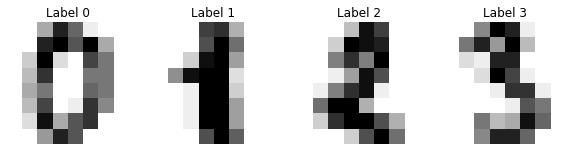

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [ ]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)